<h1>Neural Network from scratch </h1>

### Each row is a training example, each column is a feature  [f1, f2, f3]
X=[0,0,1],[0,1,1],[1,0,1],[1,1,1]
y=[0],[1],[1],[0])

In [16]:
#Initializing x and y with numpy
import numpy as np
import pandas as pd
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

<h3>Activation Function </h1>

In [17]:
# sigmoid  function
def sigmoid(t):
    '''This will return the sigmoid value of the function'''
    return 1/(1+np.exp(-t))
def relu(t):
    '''This will return the relu value of the function'''
    return np.maximum(0, t)


In [23]:
# derivative sigmoid
def sigmoid_derivative(d):
    return d * (1 - d)
def relu_derivative(d):
    return np.where(d > 0, 1, 0)

In [24]:
class NeuralNetwork:
    def __init__(self, x, y, num):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], num)
        self.bias1 = np.random.rand(1, num)  # Initialize bias for layer 1
        self.weights2 = np.random.rand(num, 1)
        self.bias2 = np.random.rand(1, 1)  # Initialize bias for layer 2
        self.y = y
        self.output = np.zeros(y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1) + self.bias1)
        self.layer2 = relu(np.dot(self.layer1, self.weights2) + self.bias2)
        return self.layer2

    def backprop(self):
        derv_weights2 = np.dot(self.layer1.T, 2 * (self.y - self.output) * relu_derivative(self.output))
        derv_weights1 = np.dot(self.input.T, np.dot(2 * (self.y - self.output) * relu_derivative(self.output), self.weights2.T)* sigmoid_derivative(self.layer1))

        # Update biases
        derv_bias2 = np.sum(2 * (self.y - self.output) * relu_derivative(self.output), axis=0, keepdims=True)
        derv_bias1 = np.sum(np.dot(2 * (self.y - self.output) * relu_derivative(self.output), self.weights2.T)* sigmoid_derivative(self.layer1), axis=0, keepdims=True)

        self.weights1 += derv_weights1
        self.bias1 += derv_bias1
        self.weights2 += derv_weights2
        self.bias2 += derv_bias2
    def train(self, X, y):
        self.input = X
        self.output = self.feedforward()
        self.backprop()

In [25]:
model=NeuralNetwork(X,y,10)
d=pd.DataFrame(np.zeros(1500))
for i in range(1500):
    if i % 100 ==0:#For each 100 epochs output will come 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(model.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - model.feedforward())))) # mean sum squared loss
        print ("\n")
    loss=np.mean(np.square(y - model.feedforward()))
    d.iloc[i]=loss
    model.train(X, y)

for iteration # 0

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[5.21655601]
 [5.75113104]
 [5.75898084]
 [6.17366548]]
Loss: 
27.636936702692545


for iteration # 100

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.]
 [0.]
 [0.]
 [0.]]
Loss: 
0.5


for iteration # 200

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.]
 [0.]
 [0.]
 [0.]]
Loss: 
0.5


for iteration # 300

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.]
 [0.]
 [0.]
 [0.]]
Loss: 
0.5


for iteration # 400

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.]
 [0.]
 [0.]
 [0.]]
Loss: 
0.5


for iteration # 500

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1.

Text(0.5, 1.0, 'Convergence Plot')

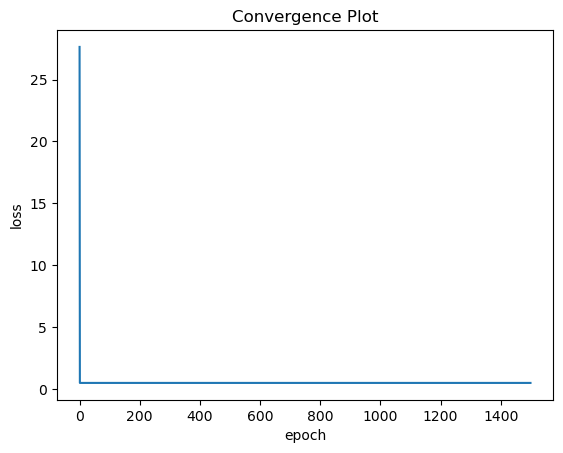

In [26]:
import matplotlib.pyplot as plt
plt.plot(d)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Convergence Plot')